In [1]:
import numpy as np
import random
import heapq

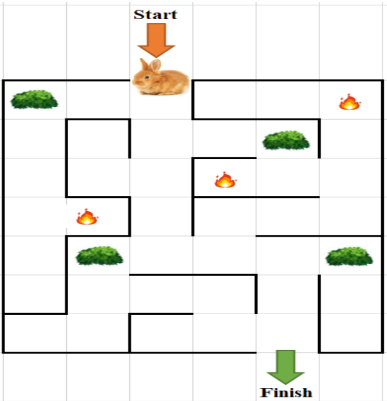

<font color="red">**Representation of environment with dynamic input.**</font>

The inputs of fire, bush and rabbit position are made to be dynamic to provide the flexibility to the user.

If these are to be treated as static inputs even that can be done

In [2]:
#Code Block : Empty MAZE

empty_list=[' ']*6
empty_maze=[]
for _ in range(8):
    empty_maze.append(empty_list.copy())
empty_maze

[[' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ']]

In [3]:
#Code Block : User input for Rabbit Position
x=int(input('Enter x of rabbit: '))
y=int(input('Enter y of rabbit: '))
rabbit_position = (x,y)
# rabbit_position = (0, 2)
print(rabbit_position)

Enter x of rabbit: 0
Enter y of rabbit: 2
(0, 2)


In [4]:
#Code Block : User inputs for Bush's coordinates

bush_positions = []
while True:
  x = int(input('Enter x of bush: '))
  y = int(input('Enter y of bush: '))
  bush_positions.append((x,y))
  z = int(input('Are there more bushes? Press 1 for Yes, 0 for No: '))
  if z==0:
    break

# bush_positions=[(0, 0), (1, 4), (4, 1), (4, 5)]

Enter x of bush: 0
Enter y of bush: 0
Are there more bushes? Press 1 for Yes, 0 for No: 1
Enter x of bush: 1
Enter y of bush: 4
Are there more bushes? Press 1 for Yes, 0 for No: 1
Enter x of bush: 4
Enter y of bush: 1
Are there more bushes? Press 1 for Yes, 0 for No: 1
Enter x of bush: 4
Enter y of bush: 5
Are there more bushes? Press 1 for Yes, 0 for No: 0


In [5]:
#Code block : User inputs for Fire's coordinates

fire_positions = []
while True:
  x = int(input('Enter x of fire: '))
  y = int(input('Enter y of fire: '))
  fire_positions.append((x,y))
  z = int(input('Are there more fires? Press 1 for Yes, 0 for No: '))
  if z==0:
    break

# fire_positions=[(0, 5), (2, 3), (3, 1)]

Enter x of fire: 0
Enter y of fire: 5
Are there more fires? Press 1 for Yes, 0 for No: 1
Enter x of fire: 2
Enter y of fire: 3
Are there more fires? Press 1 for Yes, 0 for No: 1
Enter x of fire: 3
Enter y of fire: 1
Are there more fires? Press 1 for Yes, 0 for No: 0


In [6]:
#Code block : User inputs for Goal coordinates

x = int(input('Enter x of goal: '))
y = int(input('Enter y of goal: '))
goal_position = (x,y)
# goal_position=(7, 4)

Enter x of goal: 7
Enter y of goal: 4


In [7]:
#Code block: Initializing all the input coordinates to emty maze

#Coordinates of fires in the maze
for elem in fire_positions:
  empty_maze[elem[0]][elem[1]]='F'

#Coordinates of bushes in the maze
for elem in bush_positions:
  empty_maze[elem[0]][elem[1]]='B'

#Coordinate of Source in the maze
empty_maze[rabbit_position[0]][rabbit_position[1]]='S'

#C0ordinate of Goal in the maze
empty_maze[goal_position[0]][goal_position[1]]='G'

maze = empty_maze.copy()

maze

[['B', ' ', 'S', ' ', ' ', 'F'],
 [' ', ' ', ' ', ' ', 'B', ' '],
 [' ', ' ', ' ', 'F', ' ', ' '],
 [' ', 'F', ' ', ' ', ' ', ' '],
 [' ', 'B', ' ', ' ', ' ', 'B'],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', 'G', ' ']]

In [8]:
#Row wise numbering of each cell

number_matrix = list(np.reshape(np.arange(0,len(maze)*len(maze[0])),(len(maze),len(maze[0]))))
number_maze = []
for i in range(0,len(number_matrix)):
  number_maze.append(list(number_matrix[i]))
number_maze


#dictionary to store row-wise number for each coordinates
num_maze_dict = {}
for row in range(0,len(maze)):
  for col in range(0,len(maze[row])):
    num_maze_dict[(row,col)]=number_maze[row][col]

In [9]:
#Initializing the walls in the maze
#Take any value in the list,
#For example: (2,3)
# It Implies rabbit cannot do transition from 2nd cell to the 3rd cell in the maize

walls = [(2,3),(3,2),(1,7),(7,1),(3,9),(9,3),(4,10),(10,4)
        ,(10,11),(11,10),(7,8),(8,7),(6,7),(7,6),(9,15),(15,9)
        ,(12,13),(13,12),(14,15),(15,14),(15,21),(21,15),(16,22)
        ,(22,16),(13,19),(19,13),(19,20),(20,19),(20,21),(21,20)
        ,(19,25),(25,19),(22,28),(28,22),(23,29),(29,23),(24,25)
        ,(25,24),(30,31),(31,30),(26,32),(32,26),(27,33),(33,27)
        ,(33,34),(34,33),(34,35),(35,34),(32,38),(38,32),(37,38)
        ,(38,37),(30,36),(36,30),(40,41),(41,40),(36,42),(42,36)
        ,(37,43),(43,37),(38,44),(44,38),(39,45),(45,39),(41,47),(47,41)]

**Function for printing the optimal path the hare should take to reach the goal**

In [10]:
def print_optimal_path(maze, path):
    """
    Prints the maze with the optimal path marked in yellow.

    This function takes a maze represented as a 2D list and a list of coordinates representing the optimal path.
    It then prints the maze with the following conventions:

    - The start point of the optimal path is marked as 'S' in yellow.
    - The end point of the optimal path is marked as 'G' in yellow.
    - Intermediate points along the optimal path are marked as 'o' in yellow.
    - Blocks with 'B' indicate bush and are marked in green.
    - Blocks with 'F' indicate fire and are marked in red.
    - Any other blocks in the maze are marked as 'X'.


    Parameters:
        maze (list of lists): A 2D list representing the maze where each cell is a character ('X', 'B', 'F', or empty space).
        path (list of tuples): A list of (row, column) tuples representing the optimal path in the maze.

    Example:
        maze = [
            ['X', 'B', 'X', 'X'],
            ['X', ' ', ' ', 'X'],
            ['X', 'B', ' ', 'X'],
            ['X', 'X', 'F', 'X'],
        ]
        path = [(1, 1), (1, 2), (2, 2), (2, 3)]
        print_optimal_path(maze, path)

    Output:
        X B X X
        X S o X
        X B o G
        X X F X
    """
    for row_idx, row in enumerate(maze):
        for col_idx, cell in enumerate(row):
            if (row_idx, col_idx) in path:
                if (row_idx, col_idx) == path[0]:
                    #Start point in the optimized path printed as S
                    print('\033[94mS\033[0m', end=' ')# Yellow color for optimal path
                elif (row_idx, col_idx) == path[-1]:
                    #End point in the optimized path printed as G
                    print('\033[94mG\033[0m', end=' ')# Yellow color for optimal path
                else:
                    #intermediate points in the optimized path are printed as o
                    print('\033[94mo\033[0m', end=' ')# Yellow color for optimal path

            elif cell == 'B':
                print('\033[92mB\033[0m', end=' ')  # Green color for bu# Yellow color for optimal pathsh

            elif cell == 'F':
                print('\033[91mF\033[0m', end=' ')  # Red color for fire

            else:
                print('X', end=' ')
        print()

**Heuristic cost**

In [11]:
def heuristic(initial,end):
  """
    Calculates the Manhattan distance between two points in a grid.

    This function takes two tuples representing points in a 2D grid,
    where each tuple contains the coordinates of a point (row, column).
    It then returns the Manhattan distance between the two points.
    The Manhattan distance is the sum of the absolute differences of their coordinates.

    Parameters:
        initial (tuple): A tuple representing the coordinates of the initial point.
        end (tuple): A tuple representing the coordinates of the end point.

    Returns:
        int: The Manhattan distance between the initial and end point.

    Example:
        initial = (1, 2)
        end = (4, 6)
        distance = heuristic(initial, end)

    Output:
        7  # This is calculated as abs(1-4) + abs(2-6)
    """
  return abs(initial[0] - end[0]) + abs(initial[1] - end[1])

**A star algorithm**

In [12]:
def astar(maze, start, goal,not_allowed):
  """
  Find the shortest path from the 'start' to the 'goal' in a given maze using the A* algorithm.

  The A* algorithm is an informed search algorithm that combines the cost to reach a node (g_score)
  with the estimated cost from that node to the goal (heuristic) to prioritize the exploration of nodes.

  Parameters:
      maze (list of lists): A 2D grid representing the maze, where each cell can be ' ', 'F','B'
          ' ' indicates an open space, 'F' indicates fire and 'B' indicates a bush .
      start (tuple): A tuple (row, col) representing the starting position in the maze.
      goal (tuple): A tuple (row, col) representing the goal position in the maze.

  Returns:
      tuple: A tuple containing the following elements:
          - path (list of tuples): The sequence of positions from the 'start' to the 'goal' that form the shortest path.
          - actual_costs (dict): A dictionary mapping each position in the 'path' to its actual cost (cumulative g_score).
          - heuristic_costs (dict): A dictionary mapping each position in the 'path' to its estimated cost to the goal (heuristic).
          - f_costs (dict): A dictionary mapping each position in the 'path' to its total cost f(n) (actual_cost + heuristic_cost).

      If no path is found from 'start' to 'goal', the function returns (None, None, None, None).

  Note:
      - The 'heuristic' function used for estimating costs must be defined elsewhere.
      - Additional penalties are applied for 'F' (fire) and 'B' (bush) cells in the maze.
  """


  open_set = []
  heapq.heappush(open_set, (0, start))
  came_from = {}
  g_score = {(row, col): float('inf') for row in range(len(maze)) for col in range(len(maze[0]))}
  g_score[start] = 0
  f_score = {(row, col): float('inf') for row in range(len(maze)) for col in range(len(maze[0]))}
  f_score[start] = heuristic(start, goal)

  while open_set:
      current = heapq.heappop(open_set)[1]

  #   GOAL TEST
      if current == goal:
          path = []
          actual_costs = {}
          heuristic_costs = {}
          f_costs = {}
          while current in came_from:
              path.append(current)
              current = came_from[current]
          path.append(start)
          path.reverse()

          # Calculate actual and heuristic costs for each step of the path
          total_actual_cost = 0.0
          for step in path:
              actual_costs[step] = total_actual_cost
              total_actual_cost += 3
              heuristic_costs[step] = heuristic(step, goal)
              f_costs[step]=actual_costs[step] + heuristic(step, goal)

          return path, actual_costs, heuristic_costs, f_costs

  #   THIS CODE HAS THE TRANSITION OR SUCCESSION FUNCTION
      for neighbor in [(current[0], current[1]+1), (current[0], current[1]-1), (current[0]+1, current[1]), (current[0]-1, current[1])]:
          if neighbor not in num_maze_dict.keys() or neighbor in [(7,1),(7,2),(7,3),(7,5)] or neighbor in list(came_from.values()):
            continue
          elif (num_maze_dict[current],num_maze_dict[neighbor]) in not_allowed:
            continue
          else:
              tentative_g_score = g_score[current] + 3

              # Check for penalties
              if maze[neighbor[0]][neighbor[1]] == 'F':
                  tentative_g_score += 5  # Penalty for fire
              elif maze[neighbor[0]][neighbor[1]] == 'B':
                  tentative_g_score += 1  # Penalty for bush
              if tentative_g_score < g_score[neighbor]:
                  came_from[neighbor] = current
                  g_score[neighbor] = tentative_g_score
                  f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                  heapq.heappush(open_set, (f_score[neighbor], neighbor))

  return None, None, None, None  # No path found

In [13]:
#Code Block : Taking the user input values to set the start and goal state


start = rabbit_position
goal =  goal_position

In [14]:
#Executing A*

# Find and print the path
path, actual_costs, heuristic_costs, f_costs = astar(maze, start, goal,walls)
print("Path: ",path)
print("Actual_costs:")
print(actual_costs)
print("Heuristic_costs:")
print(heuristic_costs)
print("f_costs")
print(f_costs)
print('Total Path cost: ',list(actual_costs.values())[-1])
print_optimal_path(maze=maze,path=path)


Path:  [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4)]
Actual_costs:
{(0, 2): 0.0, (1, 2): 3.0, (2, 2): 6.0, (3, 2): 9.0, (4, 2): 12.0, (4, 3): 15.0, (4, 4): 18.0, (5, 4): 21.0, (6, 4): 24.0, (7, 4): 27.0}
Heuristic_costs:
{(0, 2): 9, (1, 2): 8, (2, 2): 7, (3, 2): 6, (4, 2): 5, (4, 3): 4, (4, 4): 3, (5, 4): 2, (6, 4): 1, (7, 4): 0}
f_costs
{(0, 2): 9.0, (1, 2): 11.0, (2, 2): 13.0, (3, 2): 15.0, (4, 2): 17.0, (4, 3): 19.0, (4, 4): 21.0, (5, 4): 23.0, (6, 4): 25.0, (7, 4): 27.0}
Total Path cost:  27.0
B X S X X F 
X X o X B X 
X X o F X X 
X F o X X X 
X B o o o B 
X X X X o X 
X X X X o X 
X X X X G X 
